# Who survived the Titanic Disaster?

This project will be using the famous Titanic dataset which includes information on the passengers.  To start with, I will follow along the lines of the Udemy course (data visualization with Python) which gives a basic introduction to the data and some of the seaborn plotting techniques.  In my analysis of the data, I go beyond what is shown in this course to look for other correlations which may exist in the data and I also apply my machine learning skills with Scikit-Learn at the end.  This is beyond what is in the Udemy course.

In turn, the data comes from the Kaggle Titanic Challenge at the following link:

https://www.kaggle.com/c/titanic-gettingStarted

From here, I've downloaded the train.csv file into the same directory as this notebook

This first things I have to do, as with any python program, is to import my modules.  In this notebook, I will be extensively using the numpy and pandas modules.  I will also be using matplotlib and seaborn for visualization.

In [1]:
# First of all, import files into python
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# The following is required to visualise plots within the iPython notebook
%matplotlib inline


Now I want to read the data into a pandas dataframe and actually visualise it.  This is very straightforward in python/pandas.  I don't want to look at the whole DataFrame for now, I just want to look at the first few entries.

In [2]:
titanic_df = pd.read_csv("./train.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In the "Survived" column, 0 means that they died and a 1 means that they survived

The "SibSp" column represents the number of siblings they had on board

The Parch column refers to the number of parents or children they have on board.

e.g. Miss Laina Heikkinen (PassengerId = 3) was alone on the ship

Now I want to know information about each of the columns, such as the number of entries in each column.  That is important as not every column could have an entry.  In fact, that is something we observe with this dataset.

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


The following text comes form the Udemy course and is something which I will follow along with.  I will also explore more deeply into the dataset than the Udemy course did.

All good data analysis projects begin with trying to answer questions. Now that we know what column category data we have let's think of some questions or insights we would like to obtain from the data. So here's a list of questions we'll try to answer using our new data analysis skills!

First some basic questions:

    1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
    2.) What deck were the passengers on and how does that relate to their class?
    3.) Where did the passengers come from?
    4.) Who was alone and who was with family?
    
Then we'll dig deeper, with a broader question:

    5.) What factors helped someone survive the sinking?
    
First of all, I just want to get my head around some of the data.  How old were people, how many people had siblings/spouses on board.  How many people had parents/children on board (these should double counted of course, because both the parent/child will and sibling/spouse will both be recorded).

The first plot I have is just a histogram of the age distribution.  With a histogram, the column height represents the number of people in that age "bin".  The default binning is 10 bins.  As we can see, the majority of people are between 20 and 40 years old.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109708390>]], dtype=object)

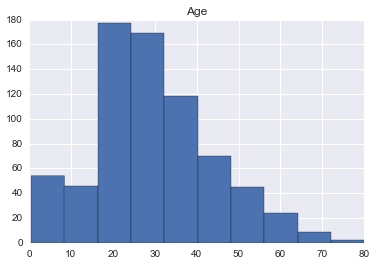

In [4]:
titanic_df.hist('Age')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1094f1d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1097a8e10>], dtype=object)

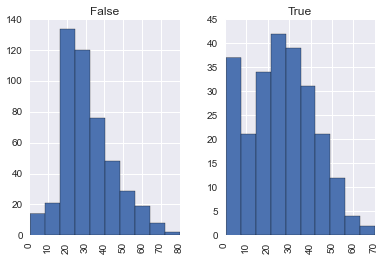

In [5]:
# Now, what were the ages of people who had siblings or spouses with them?

titanic_df.hist('Age', titanic_df["SibSp"]>0)

# Of course, the numbers below 20 are most likely to be siblings, rather then spouses but you never know!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a0e23d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10a345fd0>], dtype=object)

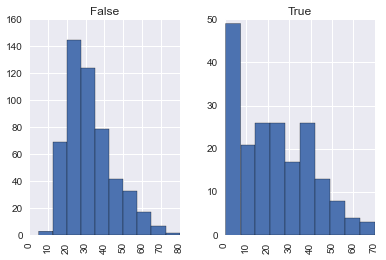

In [6]:
# Now, what were the ages of people who had parents or children with them?

titanic_df.hist('Age', titanic_df["Parch"]>0)

So, everyone under the age of 10 was there with a parent although there were some teenagers who were there without their parents!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a5a01d0>]], dtype=object)

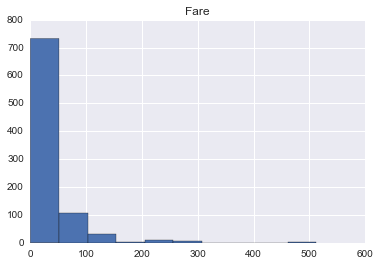

In [7]:
# Now, what is the distribution of fares paid on the titanic (in British pounds)

titanic_df.hist('Fare')

This shows that most of the fares were below 50 pounds.  There was one very expensive fare though above 400 pounds and some other fares over 200 pounds.  Let's see if these survived!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a50f410>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10a9349d0>], dtype=object)

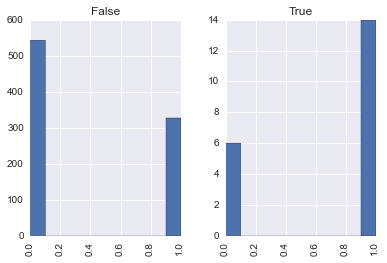

In [8]:
titanic_df.hist('Survived', titanic_df["Fare"]>200)

So, of the 20 fares that were paid over £200, 70% of people died.  However, for fares under £200, which is the vast majority, much less than 50% survivded.  Let's have a look at fares over £100.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10a9b8b10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10ac8e7d0>], dtype=object)

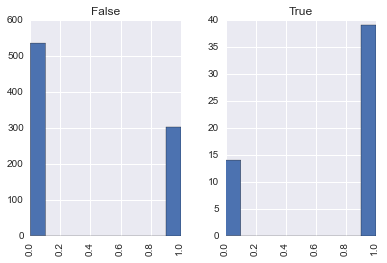

In [9]:
titanic_df.hist('Survived', titanic_df["Fare"]>100)

So this is similar to the £200 plot, where 14/53 people survived if they paid more than £100 for their fare.  This is 26% and actually better than the 30% of the £200 plot.  However, I havent worked out any uncertainties on these numbers which will be quite large, as the population of these classes is quite low.  Anyroad, let's keep goign and calculate the same for a fare of £50 or higher.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10aebcc50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10afcf2d0>], dtype=object)

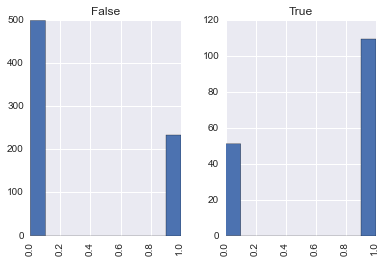

In [10]:
titanic_df.hist('Survived', titanic_df["Fare"]>50)

So, again, this is similar to the £200 and £50 plots which shows that the higher fare you paid, the more likely you were to survive.  One thing I will look into is fare vs sex of the passenger and if they survived or not  For now, let's decrease the fare/survival study even lower and look at £20 as the criterion.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10aef6dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b337490>], dtype=object)

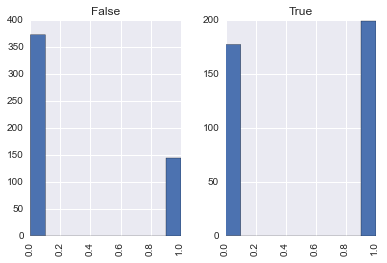

In [11]:
titanic_df.hist('Survived', titanic_df["Fare"]>20)

Now we are starting to see things come down a bit.  Now it is closer to 50:50 whether you survived or not if your fare was over £20.  However, if you look at the left hand plot, then you can see that if your fare was under £20, you were odds on not to survive.

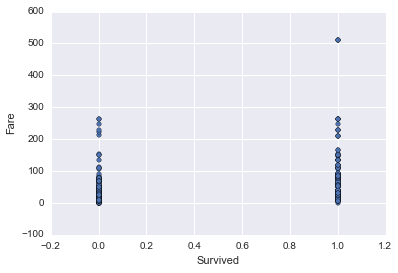

In [12]:
titanic_df.plot(kind='scatter',x='Survived',y='Fare')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10b69b450>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10b7b81d0>], dtype=object)

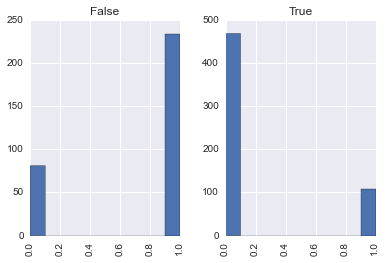

In [13]:
titanic_df.hist('Survived', titanic_df["Sex"]=="male")

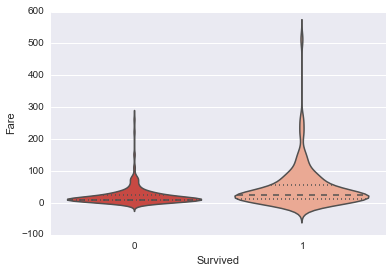

In [14]:
sns.violinplot(titanic_df['Fare'],titanic_df['Survived'],color='Reds_r')

Now, let's have a look at how many passengers were male and how many were female.  I can't just do this with the line:

titanic_df.hist('Sex')

because 'Sex' is a string and not a number which is needed for a histogram.  Of course, I could create a new column in the dataframe with an integer for the sex, but instead, I can also look at this with seaborn and a "factor" plot.

http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html

http://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical_linear_models.html

Seaborn's factorplot is used for categorical data and the exampleis shown below.

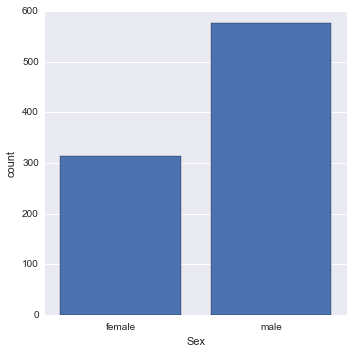

In [15]:
sns.factorplot('Sex',data=titanic_df)

Now we know the male/female count of our passenger list, we can look at what class they were in.  Again, seaborn comes to the rescue and we can split things by hue (colour).  The plot below shows the count of passengers by sex and by class.  You can see that the number of male/female passengers in 1st and 2nd class were approximately the same but there were vastly more men in 3rd class.

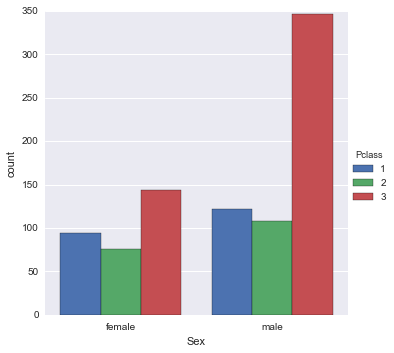

In [16]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass')

Another way of looking at this is by simply swapping the two variables around

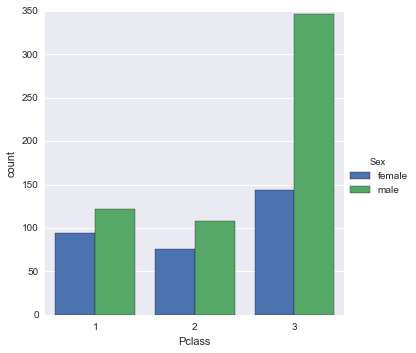

In [17]:
sns.factorplot('Pclass',data=titanic_df,hue='Sex')

What is the split between males, females and children?  Let's create a function and use the apply technique to handle this.

In [18]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [19]:
# axis=1 is used as it is a column and not an index

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

Now I want to change the letters of the code for the port of embarkation into the actual names of the cities, just because it looks better.  If this was a bigger DataFrame, I might worry about memory issues but that is not needed here.

In [20]:
def embark(passenger):
    port = passenger
    
    if port == "S":
        port = 'Southampton'
    elif port == "C":
        port = 'Cherbourg'
    elif port == "Q":
        port = "Queenstown"
    
    return port

In [21]:
titanic_df['Embarked'] = titanic_df['Embarked'].apply(embark)

In [22]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Queenstown,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,Southampton,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,Southampton,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,Southampton,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,Cherbourg,child


Now that we have created this extra column, we can use this as the hue

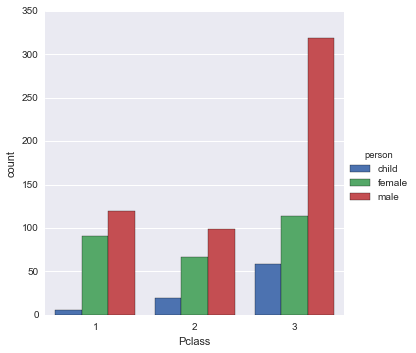

In [23]:
sns.factorplot('Pclass',data=titanic_df,hue='person')

Interestingly, there was a large number of children in the third class, which was a bit of a surprise.  I wonder how many of them were there with their parents?  This can be visualised with the following plot:

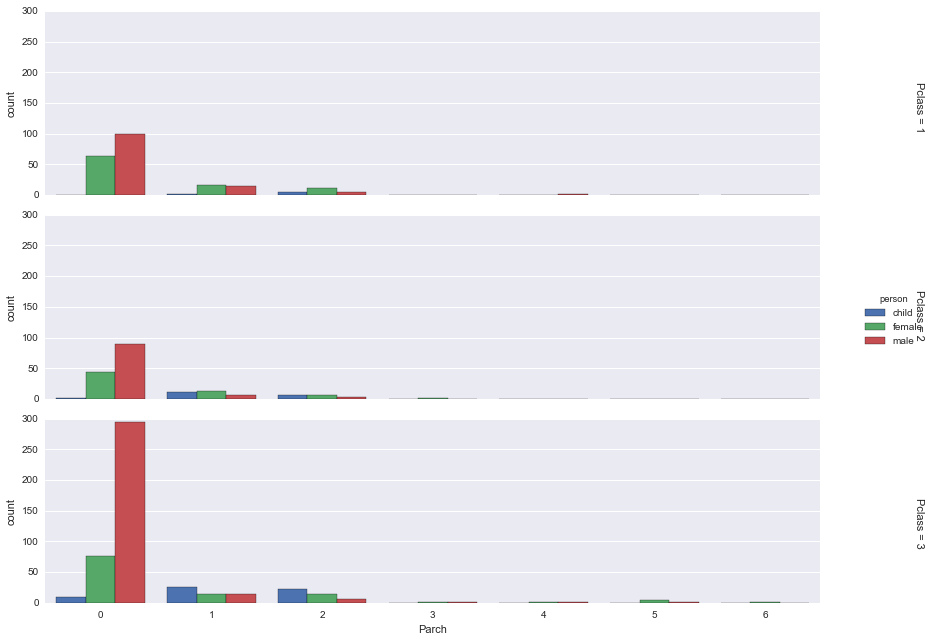

In [24]:
sns.factorplot('Parch',data=titanic_df,hue='person',row="Pclass",
               margin_titles=True, aspect=4, size=3)

Interestingly, it looks like there was a significant number of children in 3rd class without a parent!  Also, the majority of women and men (aged over 16) in 3rd class had no children (or parents) on board with them.

Now, what about siblings?  This can be viewed in a similar way as shown below.  As you can see, the distributions are broadly similar although there are more males over 16 in 3rd class who have siblings/spouses than have parents or children on board.

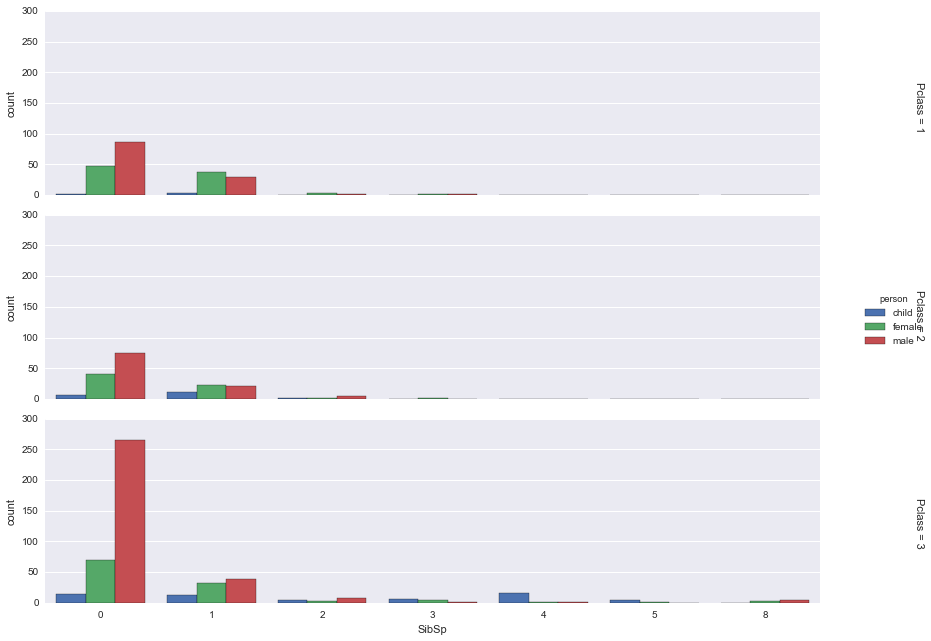

In [25]:
sns.factorplot('SibSp',data=titanic_df,hue='person',row="Pclass",
               margin_titles=True, aspect=4, size=3)

The mean number of parents/children seperated into class and sex can be viewed below.

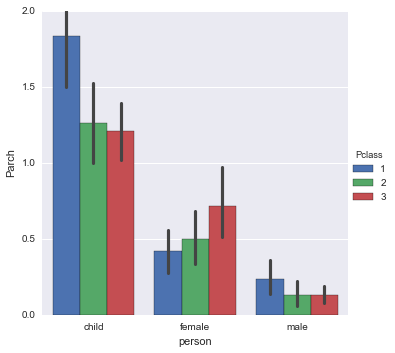

In [26]:
sns.factorplot('person','Parch',data=titanic_df,hue='Pclass')

Anyroad, let's look again at the ages ditribution.

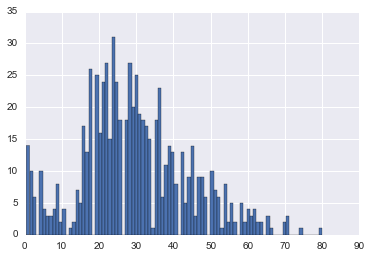

In [27]:
titanic_df['Age'].hist(bins=90)

In [28]:
# What is the mean age?
titanic_df['Age'].mean()

29.69911764705882

In [29]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
dtype: int64

Set a FacetGrid with Seaborn to allow for multiple plots on one figure.  We will map the KDE plots from the 'Age' column.  These are basically a probaility density function of the ages.

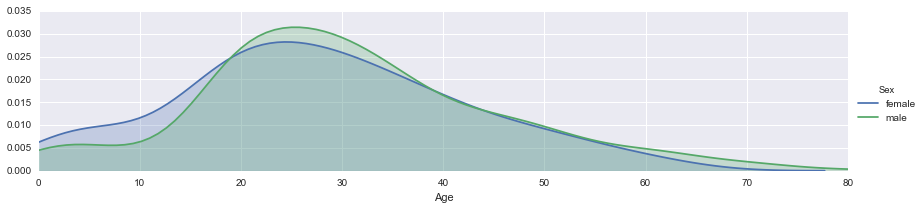

In [30]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

# Set xmax by the age of the oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

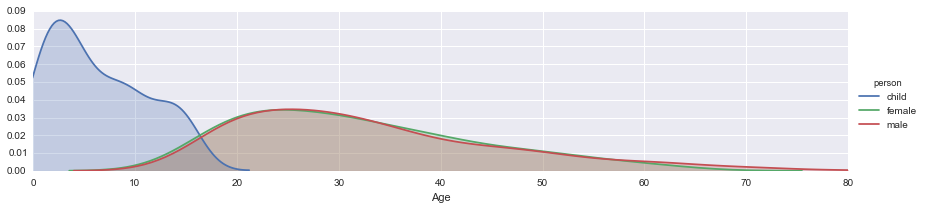

In [31]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

# Set xmax by the age of the oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()


We can also look at the distribution of ages broken into the "Pclass" of the passenger, as shown in the plot below. It looks like you are more likely to be in 1st class if you are an older passenger whereas the distribution of children's ages looks very different depending on what class they are in. This is interesting.

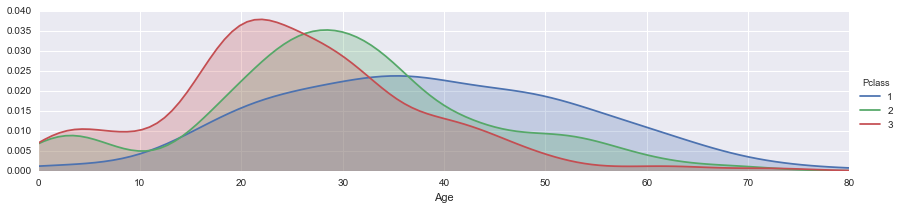

In [32]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

# Set xmax by the age of the oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

We can also look in finer detail if we split this up into the kde plots for the different classes as shown below.

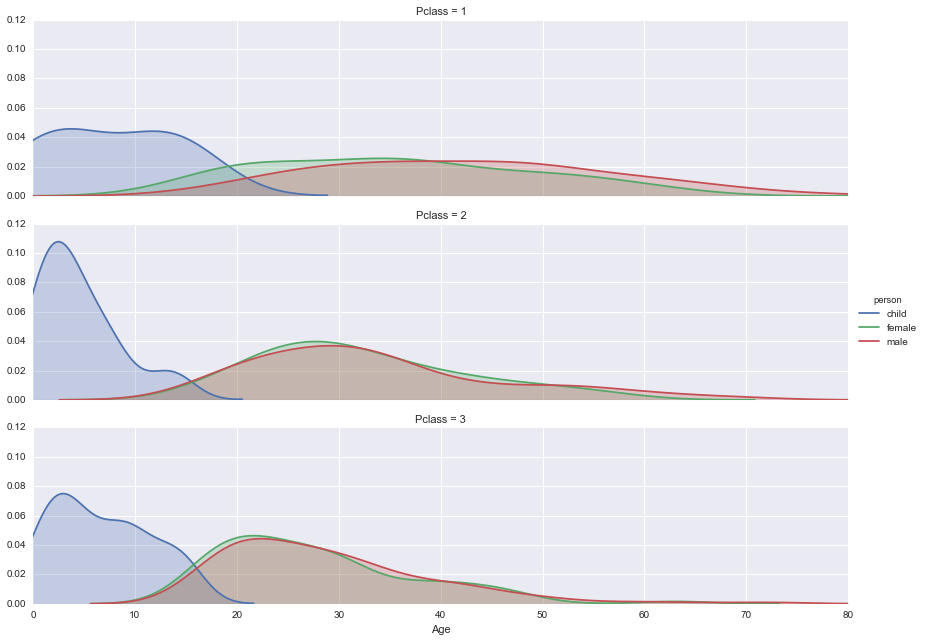

In [33]:
fig = sns.FacetGrid(titanic_df,hue='person',row="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()



Perhaps a better way to do this is to look at the plot below, which splits the age distribution up for children, women and men and you can see the probability distribution as a function of class.  This is the same information as the plot above but just grouping the plots which are relevant on top of each other.  The largest differences appear for the children although if you are an older person, it seems likely that you were in first class.  That isn't strictly true however as these plots don't show the numbers of passengers in each class, just the probability.

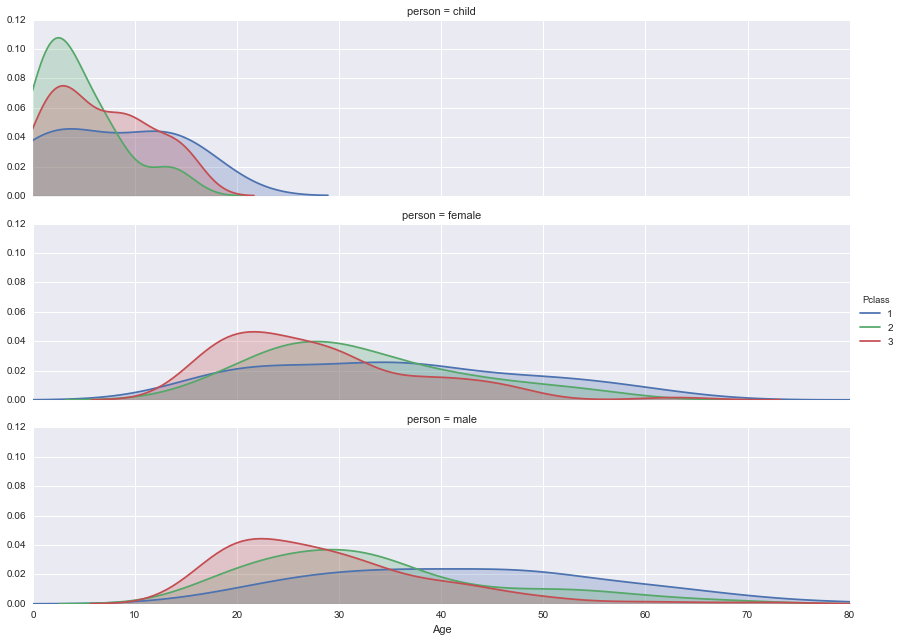

In [34]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',row="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

fig.add_legend()

We can also look at the distribution of men, women and children in terms of "Pclass".  As can be seen in the plot below, which agrees with the earlier plot, the a child is more likely to be in the 3rd class, then 2nd class then 1st class.  Females have approximately the same probability for all classes whereas men are more likely to be in the 3rd class.

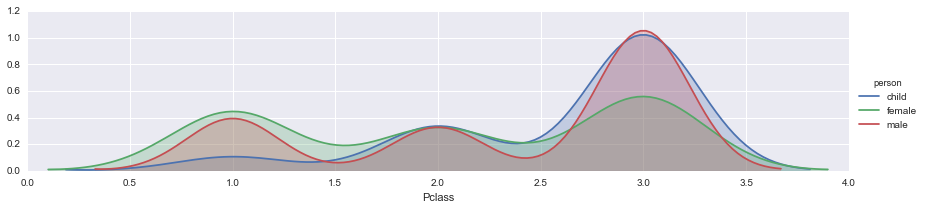

In [35]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Pclass',shade=True)

# Set xmax by the age of the oldest passenger
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,4))

fig.add_legend()

Now we've answered the basic question about passenger demographics quite well, it is time to move onto the second question, which is:

2.) What deck were the passengers on and how does that relate to their class?

Let's first re-examine the DataFrame

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male


The problem with the cabin info is that there are lots of null values.  I can use the dropna() function to get rid of the NaN values.

In [37]:
deck = titanic_df['Cabin'].dropna()

In [38]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Now I want to extract the letter from the deck and create a new list.  From that list, I will create a new dataframe and then I will plot the information from that dataframe.  I can also change the palette.  The information on palettes can be found at this webpage:

http://matplotlib.org/users/colormaps.html

Note that using "_d" makes it darker

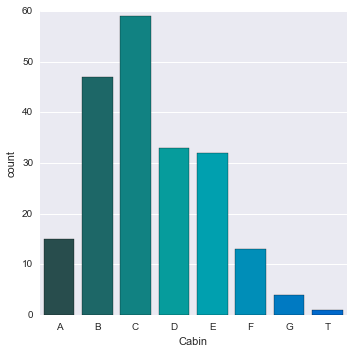

In [39]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df,palette='winter_d')

The "T" value doesn't make sense, so we will drop it out (we just want A-G)

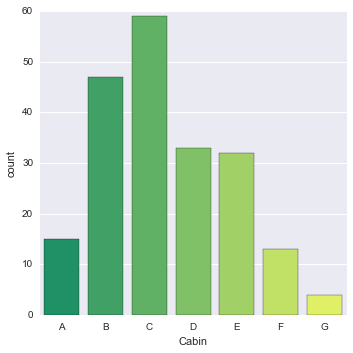

In [40]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin',data=cabin_df,palette='summer')

In [41]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male


Now lets look at the port of embarkment.  Remember that:
    
Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

Let's look at the timeline of the journey.

- April 10th: 12:00 - Leave Southampton, England
- April 10th: 18:30 - Arrive Cherbourg, France (Normandy)
- April 11th: 13:30 - Leaves Queenstown, Ireland (now known as Cobh).
- April 14th: 23:40 - Titanic hits an iceberg
- April 15th: 02:20 - Titanic sinks
- April 15th: 04:10 - Carpathia picks up the first of the survivors
- April 18th:       - Carpathia arrives in New York with 705 survivors on board

In [42]:
titanic_df['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
dtype: int64

So, the vast majority of people embarked in Southampton, then in Cherbourg, before the last few embarked in Queenstown (Cobh).  Now, it would be interesting to see what the demographic was of the passengers who embarked in these ports.  First of all, what class were the passengers in?

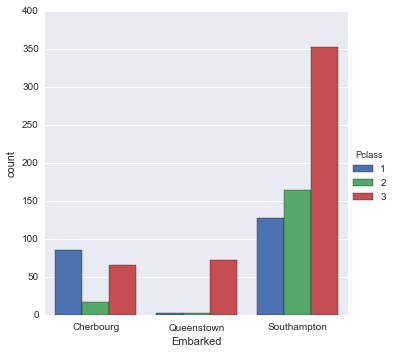

In [43]:
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',x_order=['Cherbourg','Queenstown','Southampton'])

# Note that if I don't have the "x_order" in there, I will pick up a few NaNs as we don't know where everyone boarded

Note that relatively speaking, a lot of first class passengers came from Cherbourg and a lot of 3rd class passengers came from Queenstown.  

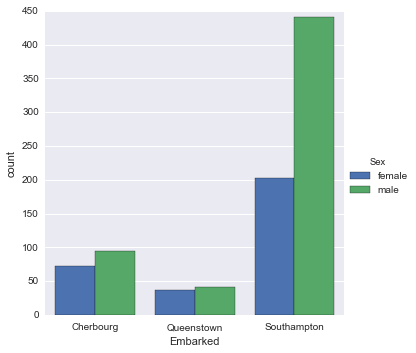

In [44]:
sns.factorplot('Embarked',data=titanic_df,hue='Sex',x_order=['Cherbourg','Queenstown','Southampton'])

So, that is interesting.  Although there is a very different distribution of passenger classes which can be found in the previous plot for Cherbourg and Queenstown, they are relatively evenly spread between males and females.  The majority of people on board were men and the plot shows that these boarded in Southampton.

Now, what about the children, We can look at the "person" column created earlier

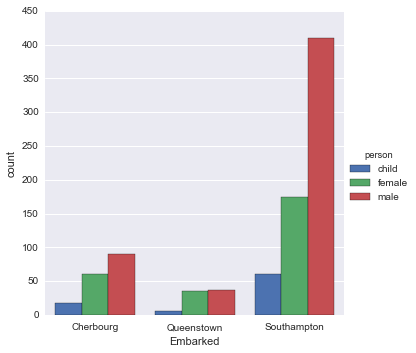

In [45]:
sns.factorplot('Embarked',data=titanic_df,hue='person',x_order=['Cherbourg','Queenstown','Southampton'])

There is not a huge amount to be gained here.  Maybe the majority of children who embarked in Cherbourg are female?  But that's about it, really. 

In [46]:
titanic_df.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


Who was alone, and who was with their family?  To do this, we can add a new column to our DataFrame to descibe this.

In [47]:
titanic_df["Alone"] = titanic_df.SibSp + titanic_df.Parch

Now, need to change the column to see whether they were alone or not

In [48]:
titanic_df["Alone"].loc[titanic_df['Alone'] >0] = 'With Family'
titanic_df["Alone"].loc[titanic_df['Alone'] ==0] = 'Alone'

/Users/macl2/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [49]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male,Alone


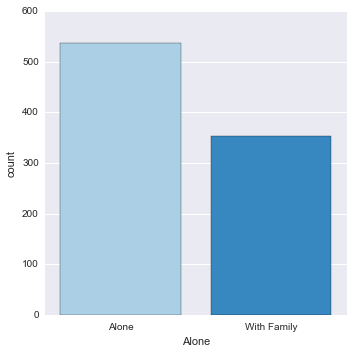

In [50]:
sns.factorplot('Alone',data=titanic_df,palette='Blues')

What factors helped someone survive the sinking of the Titanic?

In [51]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

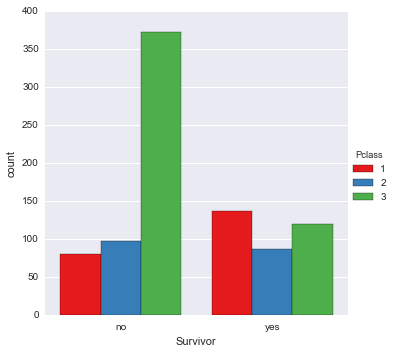

In [52]:
sns.factorplot('Survivor',data=titanic_df,hue='Pclass',palette='Set1')

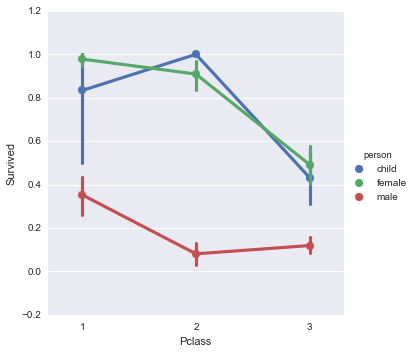

In [53]:
# Another way of looking at this is:
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

This shows that a 3rd class passenger really affected your survival rate but also, if you were a man, then whatecer class you were in, you had a smaller chance of surival than anyone else.  Note that every child in the second class survived the sinking!  This certainly points to the old adage of "women and children first" onto the lifeboats.

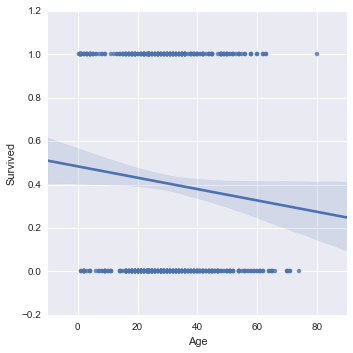

In [54]:
sns.lmplot('Age','Survived',data=titanic_df)

There is a general trend that the older the passenger was, the less likely they were to survive.  Now, lets

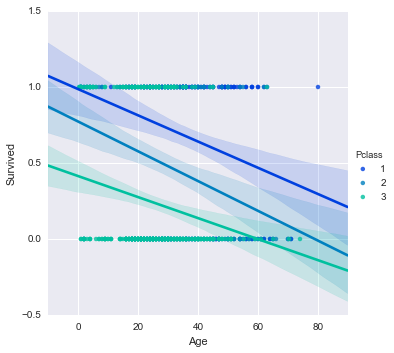

In [55]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

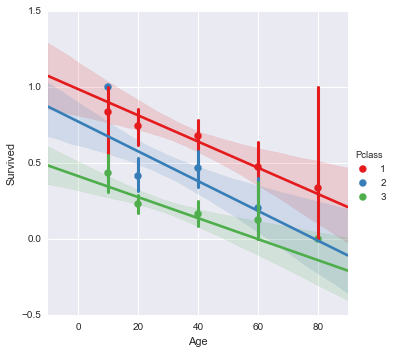

In [56]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='Set1',x_bins=generations)

How does gender and age affect things?

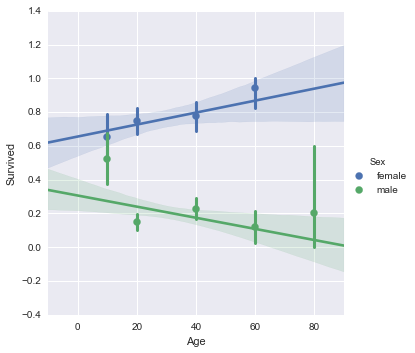

In [57]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,x_bins=generations)

Now this is interesting.  It says that if you were male, the older you were, the less likley you were to survive.  However, if you were female, the older you were, the more likely you were to survive!

1) Did the deck have an effect on the passenger survuval rate?  Did this answer match up with your intuition?

2) Did having a family member increase the odds of survivng the crash?

In [58]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male,Alone,no


To answer the first question, I will create a new dataframe because I will have to drop some rows from the dataframe due to the NaN values in the "Cabin" column.

In [59]:
titanic_df2 = titanic_df.dropna()

In [60]:
titanic_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,Southampton,male,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,Southampton,child,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,Southampton,female,Alone,yes


Now I want to create a new column called "Deck" which will parse the "Cabin" column and return the deck that the passenger was on.  Note that the cabin number is prefixed with a letter, which indicates which deck the passenger was on.  I will do this using the apply function and so first need to create a function

In [61]:
def Deck(cabin):
    return cabin[0]

In [62]:
titanic_df2['Deck'] = titanic_df2['Cabin'].apply(Deck)

/Users/macl2/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
titanic_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,Southampton,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,Southampton,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,Southampton,female,Alone,yes,C


OK, this looks good. Let's now plot this information

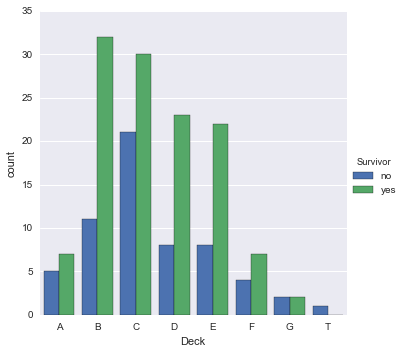

In [64]:
sns.factorplot('Deck',hue='Survivor',data=titanic_df2)

This shows that for every deck where we have information on passengers, you were more likely to surive than not survive.  What is interesting is that if you were on the 'C' deck, you were less likely to survice however, which is in marked contrast to the 'B' and 'D' decks where you were more likely to survive than any other deck.  Now, we lose a lot of information if we only look at the passengers who have this recorded, but it is still interesting.  In fact, we can quantify this below.

In [65]:
titanic_df['Survivor'].value_counts()

no     549
yes    342
dtype: int64

In [66]:
titanic_df2['Survivor'].value_counts()

yes    123
no      60
dtype: int64

So, where we take into account everyone, (in the training dataset), you only had a 38% survival rate.  However, where we do have the information on their cabin, then they had a 67% surival rate.  Now, we don't know why some passengers didn't have their cabin recorded, but if you were unlucky to fall into this set, then you only had a 31% chance of surviving!

Now let's go back to the titanic_df dataframe to answer the second question, which was:

2) Did having a family member increase the odds of survivng the crash?

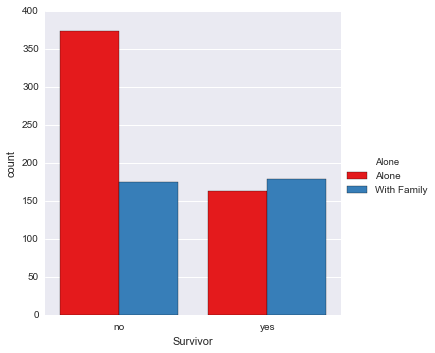

In [67]:
sns.factorplot('Survivor',data=titanic_df,hue='Alone',palette='Set1')

This shows that if you had family with you, then you had a 50% chance of survival whereas if you were alone, you only had about a 30% chance of surviving, so that it was better to be travelling with family.  However, is this just correlated to the deck that the person is in?

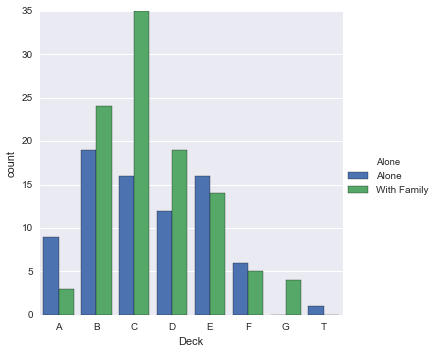

In [68]:
sns.factorplot('Deck',hue='Alone',data=titanic_df2)

So, strangely, most famlies seemed to be travelling in the C deck which was anomolous as this had the lowest survival rate of the upper decks.

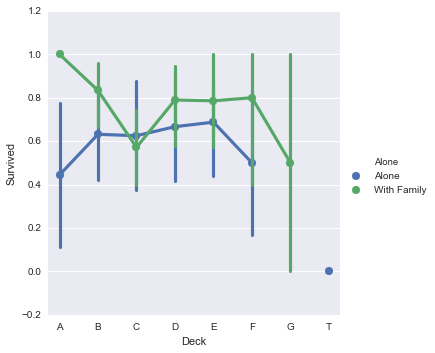

In [69]:
sns.factorplot('Deck','Survived',hue='Alone',data=titanic_df2)

Although the statistics are low, this shows that the "C" deck was definitely an anomaly.  For every other deck, you had a greater chance of surviving if you were with a family that if you were on your own.  Now, another question is were you more likely to survive if you were alone or with family depending on your sex?  What about the number of family members you had with you?

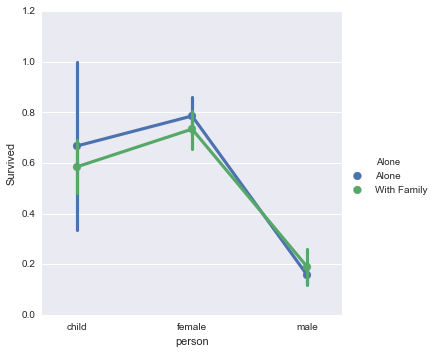

In [70]:
sns.factorplot('person','Survived',hue='Alone',data=titanic_df)

The above plot shows something very interesting, that if you were a child or female with family, you were actually less likely to survive than if you were alone.  With men, it was the other way round.  However, this seems to contradict the previous plot which showed that if you were alone, then you were more likely to die than if you were with family.  Let's have a look at the distribution of sex/child with those with family.

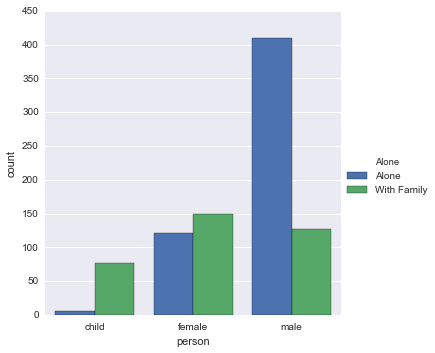

In [71]:
sns.factorplot('person',hue='Alone',data=titanic_df)

So maybe this explains it, the vast majority of people travelling alone were male (over 16 years of age) whereas they were in the minority of those travelling with family.

Now let's go back to looking at the number of family members people were travelling with.

In [72]:
titanic_df["FamMembers"] = titanic_df.SibSp + titanic_df.Parch

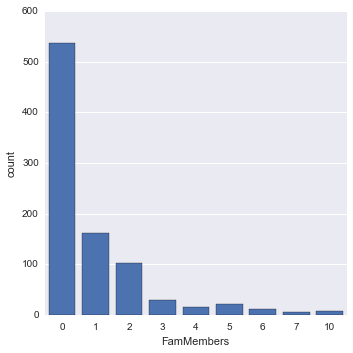

In [73]:
sns.factorplot('FamMembers',data=titanic_df)

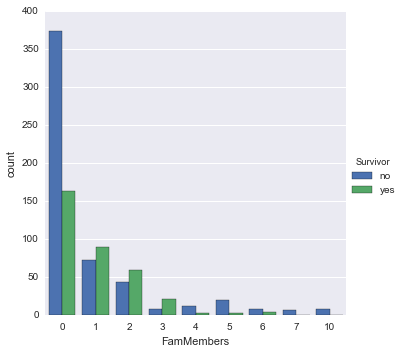

In [74]:
sns.factorplot('FamMembers',hue='Survivor',data=titanic_df)

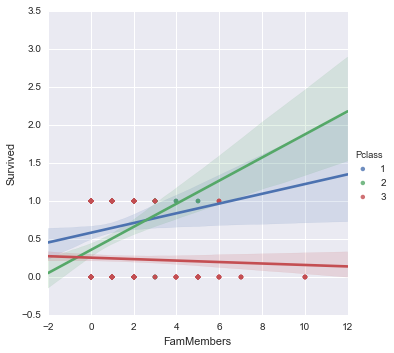

In [75]:
sns.lmplot('FamMembers','Survived',hue='Pclass',data=titanic_df)

This shows that for passengers in 3rd class, the more family members you had with you, the less likley you were to survive.  However, if you were in the 1st or 2nd classes, then you were more likely to survive the more family members that you had with you!

In [76]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,FamMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,Southampton,male,With Family,no,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,Cherbourg,female,With Family,yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,female,Alone,yes,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,Southampton,female,With Family,yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,Southampton,male,Alone,no,0


# Now let's look into doing some machine learning

One of the problems I have is that come of the columns are categorical variables.  These are 'Pclass", "Sex" and "person".  Now, of course I don't want to use both the "sex" and "person" columns and I think "person" is the best.  I will also drop some other columns

In [77]:
ml_df = titanic_df.copy()

In [78]:
ml_df.drop(["Name","Ticket","Cabin","Embarked","Survivor","FamMembers"],axis=1,inplace=True)
ml_df.dropna(inplace=True)

In [79]:
ml_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,person,Alone
0,1,0,3,male,22,1,0,7.2500,male,With Family
1,2,1,1,female,38,1,0,71.2833,female,With Family
2,3,1,3,female,26,0,0,7.9250,female,Alone
3,4,1,1,female,35,1,0,53.1000,female,With Family
4,5,0,3,male,35,0,0,8.0500,male,Alone


In [80]:
# Create new DataFrames for the Categorical Variables
Pclass_dummies = pd.get_dummies(ml_df['Pclass'])
person_dummies = pd.get_dummies(ml_df['person'])

# Let's take a quick look at the results
Pclass_dummies.columns = ["Pclass_1","Pclass_2","Pclass_3"]
person_dummies.head()

,child,female,male
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [81]:
ml_df.drop(["Sex","Alone","Pclass","person","PassengerId"],axis=1,inplace=True)

In [82]:
dummies = pd.concat([Pclass_dummies,person_dummies],axis=1)

In [83]:
# Now Concat the ml_df DataFrame with the dummy variables
ml_df = pd.concat([ml_df,dummies],axis=1)

In [84]:
ml_df.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,child,female,male
0,0,22,1,0,7.2500,0,0,1,0,0,1
1,1,38,1,0,71.2833,1,0,0,0,1,0
2,1,26,0,0,7.9250,0,0,1,0,1,0
3,1,35,1,0,53.1000,1,0,0,0,1,0
4,0,35,0,0,8.0500,0,0,1,0,0,1


OK, now I have got my catergorical variables into the correct shape, I can start to do some machine learning!

One thing I have to do is to create my X dataframe and my Y (Survived) column.  

In [85]:
Y = ml_df['Survived']
X = ml_df.drop("Survived",axis=1)

len(X)

714

In [86]:
# Flatten array
Y = np.ravel(Y)

In [87]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.82773109243697474

So, with Logistic Regression, the training dataset was approximately 83% acurate, which isn't too bad.  Now, I will run it on my test dataset (which I need to still setup) in order to get a good measure of the accuracy.

In [88]:
test_df = pd.read_csv("./test.csv")

In [89]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [90]:
test_df.drop(["Name","Cabin","Embarked","Ticket","PassengerId"],axis=1,inplace=True)

As with the previous table, I need to create the Pclass columns and the "Person" columns.

In [91]:
test_df['person'] = test_df[['Age','Sex']].apply(male_female_child,axis=1)

In [92]:
# Create new DataFrames for the Categorical Variables
Pclass_dummies_test = pd.get_dummies(test_df['Pclass'])
person_dummies_test= pd.get_dummies(test_df['person'])

# Let's take a quick look at the results
Pclass_dummies_test.columns = ["Pclass_1","Pclass_2","Pclass_3"]

In [93]:
dummies_test = pd.concat([Pclass_dummies_test,person_dummies_test],axis=1)

In [94]:
# Now Concat the test_df DataFrame with the dummy variables
test_df = pd.concat([test_df,dummies],axis=1)

In [95]:
test_df.drop(["Sex","Pclass","person"],axis=1,inplace=True)

In [96]:
test_df.dropna(inplace=True)

In [97]:
predict = log_model.predict(test_df)

print predict

[0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0
 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 1 0]
